# Recherche Locale

*Mettre tous les importation de ce notebook en haut*

In [20]:
import matplotlib.pyplot as plt
import random
import math
import copy
import sys

import numpy as np
from PIL import Image, ImageDraw, ImageFont

%matplotlib inline

## 1.1 Voyageur de commerce (TSP)

Problème du voyageur de commerce (Traveling Salesperson Problem (TSP)):

Le problème est le suivant : étant donné un ensemble de villes, quel est le chemin le plus court qui les visitera toutes et reviendra au point de départ?

Nous avons d'abord besoin d'un ensemble de villes. Nous utilisons donc un dictionnaire pour associer chaque numéro d'une ville à sa situation géographique :

In [21]:
cities = {0: (60, 200), 1: (180, 200), 2: (80, 180), 3: (140, 180),
          4: (20, 160), 5: (100, 160), 6: (200, 160), 7: (140, 140),
          8: (40, 120), 9: (100, 120), 10: (180, 100), 11: (60, 80),
          12: (120, 80), 13: (180, 60), 14: (20, 40), 15: (100, 40),
          16: (200, 40), 17: (20, 20), 18: (60, 20), 19: (160, 20)}

Voyons où se trouvent ces villes :

In [22]:
def plot_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 250])
    axes.set_ylim([0, 250]) 
    plt.plot([d[0] for d in xy], [d[1] for d in xy], "-o")
    xs, ys = xy[-1]  
    plt.plot(xs, ys, marker="o", color="red")
    plt.text(xs, ys+5, 'S', fontsize = 12)
    
def scatter_tour(tour):
    plt.figure(figsize=(6, 6))
    xy = [cities[i] for i in tour] + [cities[tour[0]]]
    axes = plt.gca()
    axes.set_xlim([0, 250])
    axes.set_ylim([0, 250])
    plt.scatter([d[0] for d in xy], [d[1] for d in xy])

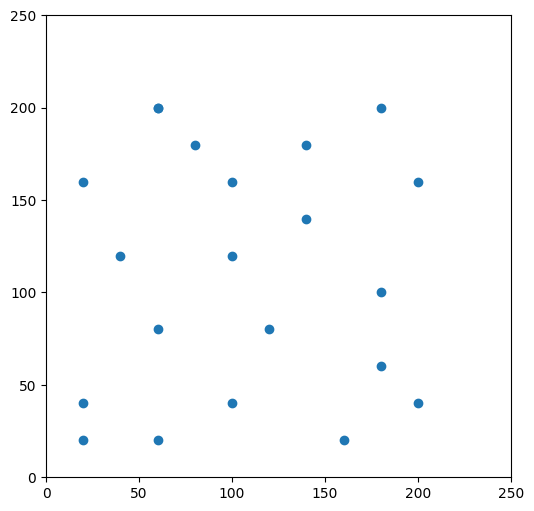

In [23]:
scatter_tour(range(20))
 

À quel point le problème TSP est-il difficile? Il s'avère que ce problème est assez difficile. Nous appelons cela **NP-dur**. 

C'est très difficile car il y a tellement de possibilités, et chaque nouvelle ville multiplie ces possibilités. 
En plus, le problème ne peut pas être divisé en sous-problèmes (comme le tri).

Pour un problème à $n$ villes, il existe $(n - 1)!$  itinéraires possibles. 
Considérons seulement 20 villes.

In [24]:
def factorial(n):
    retval = 1
    for i in range(1, n + 1):
        retval = retval * i
    return retval

In [25]:
factorial(20 - 1)

121645100408832000

Pour savoir si nous avons trouvé le plus court, nous devrons peut-être tous les vérifier. Mais c'est beaucoup trop. Ce genre de problème est souvent appelé insoluble 

$ O(factorial(n - 1)) $

## 1.2 Méthode Gloutonne (Greedy Method)

Comment résoudre ce problème de recherche du chemin optimal? Par exemple, supposons que vous puissiez simplement choisir la ville la plus proche à visiter dans chaque ville. C'est ce qu'on appelle une méthode "greedy", car elle sélectionne avidement le plus proche localement.

Nous avons besoin de la fonction $distance$

In [26]:
def distance(a, b):
    return math.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)

Complétez le code suivant:

In [27]:
def greedy_method():
    tour = [0]
    while len(tour) < len(cities):
        min_dist = 100000
        min_city = -1
        curr_city = tour[-1]
        for v in cities:
            if v not in tour:
                d = distance(cities.get(curr_city),cities.get(v))
                if d < min_dist:
                    min_dit = d 
                    min_city = v  
        tour.append(min_city)
    return tour

In [28]:
greedy_tour = greedy_method()
greedy_tour

[0, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

À quel point cette méthode est-elle bonne?

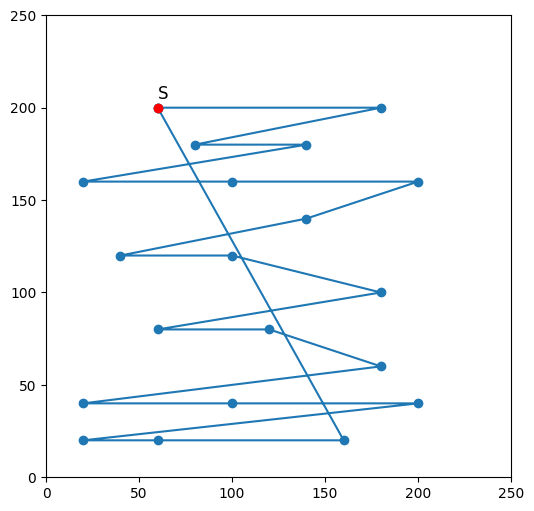

In [30]:
plot_tour(greedy_tour)

Pas très bon! Ok, essayons d'autres algorithmes.

## 1.3 Devinez et vérifiez (Guess and Check)

Considérons une méthode simple de résolution de problèmes : **deviner et vérifier**. Tout d'abord, faites une supposition et notez à quel point vous êtes proche d'une solution. Ensuite, choisissez une partie de votre supposition et envisagez une transformation locale élémentaire. Si la variation est pire, ne faites pas la transformation. Si la variation est meilleure, faites le changement. Maintenant, continuez à apporter de légères modifications jusqu'à ce que vous obteniez une solution suffisamment bonne. Nous aurons besoin:

* une méthode de représentation d'un problème (**tour**)
* une mesure de la qualité de l'estimation (par exemple, une fonction **fitness**)
* une méthode pour apporter des transformations élémentaires (par exemple, **mutation**)


Explorons un algorithme itératif deviner et vérifier.

Nous avons besoin d'une méthode pour créer des "tours" aléatoires :

In [31]:
def make_tour():
    ret_list = []
    for i in range(len(cities)):
        city = random.choice(range(len(cities)))
        while city in ret_list:
            city = random.choice(range(len(cities)))
        ret_list.append(city)
    return ret_list

In [32]:
guess = make_tour()
guess

[3, 4, 5, 2, 15, 11, 1, 0, 12, 14, 10, 16, 19, 13, 18, 6, 9, 7, 17, 8]

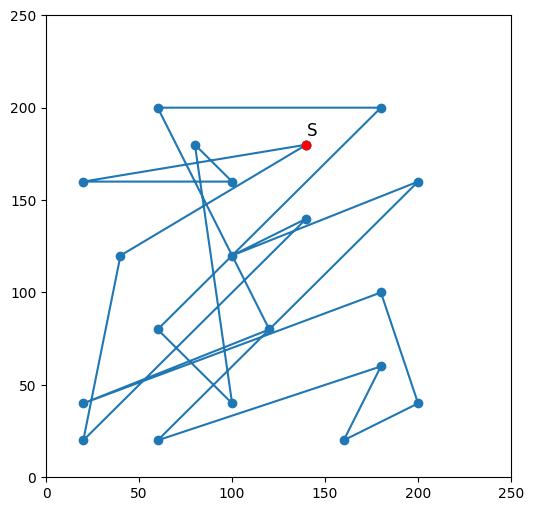

In [33]:
plot_tour(guess)

Nous avons aussi besoin d'une méthode pour mesurer la "fitness"/score d'une tournée. Nous utiliserons la "distance totale".

In [35]:
def fitness(tour):
    distances = []
    for i in range(len(tour) - 1):
        dist = distance(cities[tour[i]], cities[tour[i + 1]])
        distances.append(dist)
    distances.append( distance(cities[tour[-1]], cities[tour[0]]))
    #print(distances)
    return sum(distances)

In [36]:
fitness(greedy_tour)

2004.489961223188

In [37]:
fitness(guess)

2148.281486558006

Enfin, nous avons besoin d'une méthode de transformation d'une tournée ($mutation$). Les tours ne sont pas que des nombres aléatoires : c'est un circuit. Pour ce problème, nous utiliserons une fonction de mutation spécialisée qui permute simplement deux villes. De cette façon, ce sera toujours un circuit valide. Complétez le code de la fonction *mutation*.

In [40]:
import copy
import random

def mutate(tour):
    tour = copy.copy(tour)
    # Pick two points and swap:
    point1 = random.randint(0, len(tour) - 1)
    point2 = random.randint(0, len(tour) - 1)
    
    # Swap the elements at point1 and point2
    tour[point1], tour[point2] = tour[point2], tour[point1]
    
    return tour


In [41]:
print(guess)
guess = mutate(guess)
print(guess)

[3, 4, 5, 2, 15, 11, 1, 0, 12, 14, 10, 16, 19, 13, 18, 6, 9, 7, 17, 8]
[1, 4, 5, 2, 15, 11, 3, 0, 12, 14, 10, 16, 19, 13, 18, 6, 9, 7, 17, 8]


Maintenant, transformons itérativement la supposition et ignorons-la si elle est pire, mais remplaçons la supposition d'origine si la mutation est meilleure.

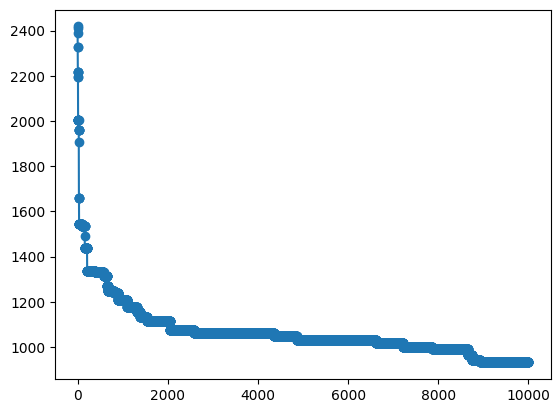

<Figure size 640x480 with 0 Axes>

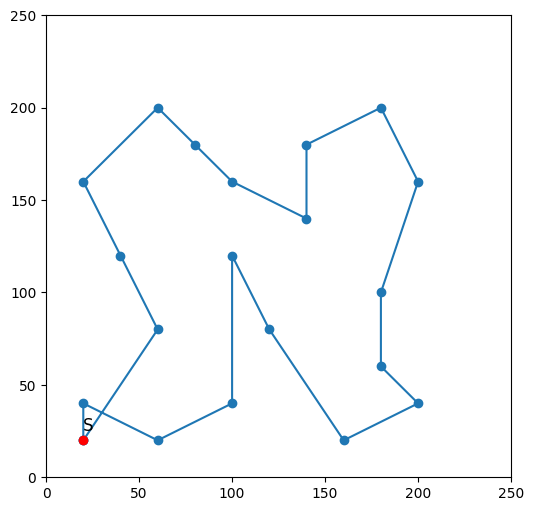

In [42]:
guess = make_tour()
fit_list = [fitness(guess)]
nber_exploration_max = 10000
for i in range(nber_exploration_max):
    new_guess = copy.copy(guess)
    for j in range(2):
        new_guess = mutate(new_guess)
    f1 = fitness(guess)
    f2 = fitness(new_guess)
    if f2 < f1:
        fit_list.append(f2)
        guess = new_guess
    else:
        fit_list.append(f1)
        
plt.plot(fit_list, marker="o")
plt.figure()
plot_tour(guess)

In [43]:
guess, fitness(guess)

([17, 14, 18, 15, 9, 12, 19, 16, 13, 10, 6, 1, 3, 7, 5, 2, 0, 4, 8, 11],
 931.3811964091989)

Pas trop mauvaise! Peut-être un peu mieux que la méthode gourmande utilisée au-dessus ($greedy\_method$).

## 1.4 Hill Climbing

 

Cette méthodologie de deviner-et-marcher est en fait appelée *hill-climbing* en raison de la métaphore suivante. Commencez à un endroit aléatoire sur une colline. Choisissez une direction à suivre. Si l'endroit où vous voudriez marcher est plus haut que là où vous êtes, faites le pas, sinon restez où vous êtes. Ce petit algorithme finira par vous emmener au sommet de la colline. Cependant, cela pourrait ne pas vous emmener à l'endroit le plus élevé car vous pourriez vous retrouver piégé sur un petit plateau (c'est-à-dire que vous devriez vous rendre à un endroit plus bas avant de vous rendre à un terrain encore plus élevé).



In [59]:
import copy
import random

def hillclimb_first_imprv(limit):
    # Initialize with a random guess
    guess = make_tour()
    
    for i in range(limit):
        # Create a new guess by mutating the current one
        new_guess = copy.copy(guess)
        new_guess = mutate(mutate(new_guess))
        
        # Calculate fitness for both the current guess and the new guess
        f1 = fitness(guess)
        f2 = fitness(new_guess)
        
        # If the new guess is an improvement, update the guess
        if f2 < f1:
            guess = new_guess
    
    return guess, fitness(guess)

def hillclimb_best_imprv(times):
    # Initialize with a random guess
    guess = make_tour()
    
    for k in range(times):
        # Create a copy of the current guess
        new_guess = copy.copy(guess)
        
        for i in range(20):
            for j in range(i + 1, 20):
                # Swap two elements to create a new configuration
                new_guess[i], new_guess[j] = new_guess[j], new_guess[i]
                
                # Calculate fitness for both the current guess and the new guess
                f1 = fitness(guess)
                f2 = fitness(new_guess)
                
                # If the new guess is an improvement, update the guess
                if f2 < f1:
                    guess = copy.copy(new_guess)
                
                # Swap back to try another pair
                new_guess[i], new_guess[j] = new_guess[j], new_guess[i]
    return guess, fitness(guess)


In [61]:
hillclimb_first_imprv(10000)
# hillclimb_best_imprv(10000)

([6, 1, 3, 7, 5, 9, 12, 19, 16, 13, 2, 0, 4, 8, 11, 14, 17, 18, 15, 10],
 1059.0380761155182)

## 1.5 Recherche Aléatoire (Random Search)


Une solution lorsqu'on reste coincé sur un plateau est de faire des mouvements aléatoires. Si on fait cela tout le temps, cela s'appelle une "recherche aléatoire" ( "random search").



In [62]:
def random_search(times):
    guess = make_tour()
    fit_list = [fitness(guess)] 
    for i in range(times):
        new_guess = mutate(guess)
        f1 = fitness(guess)
        f2 = fitness(new_guess)
        if  random.random() > .5:
            fit_list.append(f2)
            guess = new_guess
        else:
            fit_list.append(f1)
    plt.plot(fit_list, marker="o")
    plt.figure()
    plot_tour(guess)
    return guess, fitness(guess)

([13, 11, 5, 8, 14, 7, 1, 18, 3, 6, 12, 15, 4, 17, 19, 2, 10, 9, 0, 16],
 2354.2716323077348)

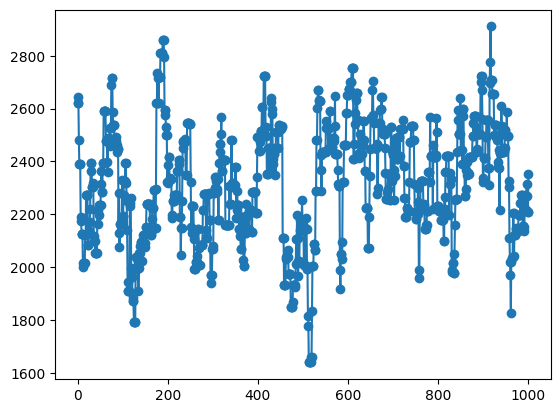

<Figure size 640x480 with 0 Axes>

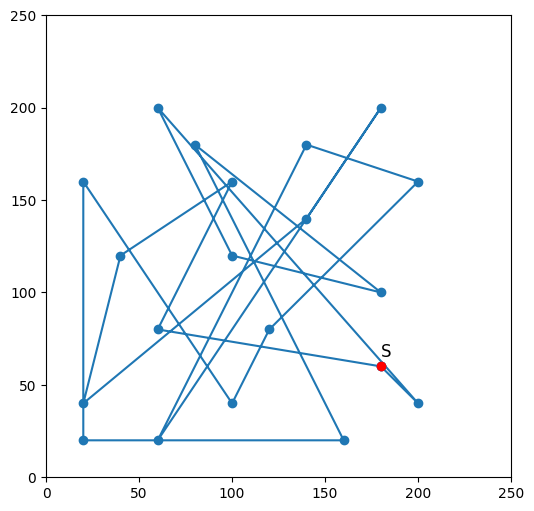

In [63]:
random_search(1000)

## 1.6  Recuit simulé (Simulated Annealing)

 
Une version légèrement meilleure de l'escalade vous permet parfois de faire des pas aléatoires, que le pas vous place ou non sur un terrain plus élevé. Bien sûr, vous ne voulez pas toujours faire des pas aléatoires (c'est ce qu'on appelle la *recherche aléatoire*), vous devrez donc contrôler votre caractère aléatoire. Si vous ne faites que des étapes aléatoires dictées par un calendrier, vous utilisez le *recuit simulé* (*simulated annealing*). Le recuit simulé vous permet de commencer à prendre des mesures aléatoires assez souvent, mais ensuite de freiner lentement l'habitude. Cela fonctionne mieux que l'escalade ($hill\_climbing$) lorsque le sol est assez lisse.

Le recuit simulé est une méthode de recherche locale qui simule le procédé de recuit en métallurgie. Ce processus alterne des cycles de refroidissement lents et de réchauffage (recuit) qui ont pour effet de minimiser l’énergie du matériau.
La méthode du recuit simulé, introduite par Kirkpatrick et al. (1983), exploite le voisinage et permet la redirection vers une solution voisine de moindre qualité avec une probabilité non nulle. Autrement dit, on n’améliore pas toujours la solution. Cette opération permet
d’échapper les optima locaux.

Le code suivant est un extré du script python du livre "Artificial Intelligence: A Modern Approach" (https://github.com/aimacode/aima-python).  Il présente le fonctionnement de la méthode Récuit Simulé. Le paramètre T représente la température qui diminue tout en long de la résolution. Une probabilité est liée à la température et aux valeurs de la fonction de fitness de la solution actuelle et celle de la solution voisine. Cette probabilité définit l’acceptation de la nouvelle solution.

<code>
    
def exp_schedule(k=20, lam=0.005, limit=100):
    """One possible schedule function for simulated annealing"""
    return lambda t: if_(t < limit, k * math.exp(-lam * t), 0)

def simulated_annealing(problem, schedule=exp_schedule()): 
    current = Node(problem.initial)
    for t in range(sys.maxsize):
        T = schedule(t)
        if T == 0:
            return current
        next = random.choice(expand(node. problem))
        delta_e = next.path_cost - current.path_cost
        if delta_e > 0 or probability(math.exp(delta_e/T)):
            current = next
            
</code>

Le recuit simulé peut être décrit comme un **"équilibre entre l'exploitation et l'exploration".**

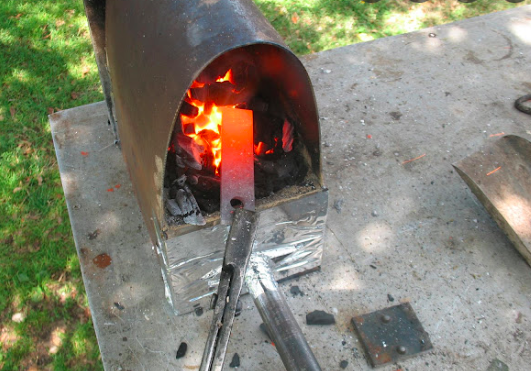

In [64]:
def exp_schedule(k=20, lam=0.005, limit=100):
    """One possible schedule function for simulated annealing"""
    return lambda t: (k * np.exp(-lam * t) if t < limit else 0)

def probability(p):
    """Return true with probability p."""
    return p > random.uniform(0.0, 1.0)



In [65]:
t_schedule = exp_schedule(limit=1000)
for t in range(100, 1000, 10):
    T = t_schedule(t)
    print(T)

12.130613194252668
11.538996207609733
10.97623272188053
10.44091553522032
9.93170607582819
9.447331054820294
8.986579282344431
8.548298638974535
8.131393194811983
7.734820469090024
7.357588823428847
6.998754982223106
6.657421673961591
6.332735387581064
6.023884238244043
5.730095937203802
5.450635860680252
5.18480521291783
4.931939278832129
4.691405761875953
4.462603202968596
4.244959476534861
4.037930359893108
3.8409981724150817
3.6536704810546934
3.475478869008903
3.3059777644317307
3.144743326272552
2.991372384452701
2.845481431730272
2.706705664732254
2.574698071756085
2.449128565059638
2.3296831554699393
2.2160631672466775
2.1079844912372865
2.0051768744560743
1.9073832443109922
1.8143590657882502
1.7258717299874098
1.641699972477976
1.5616333200230625
1.4854715642866776
1.413024261208592
1.344110254794995
1.2785572241341514
1.216201252504359
1.1568864174967692
1.1004644011281446
1.0467941189686476
0.9957413673572789
0.9471784878228182
0.900984047871156
0.8570425373408037
0.8152440

In [77]:
def simulated_annealing(times = 10000):
    guess = make_tour()
    f1 = fitness(guess)
    fit_list = [fitness(guess)]
    t_schedule = exp_schedule(times)
    for t in range(times):
        new_guess = mutate(guess)
        f2 = fitness(new_guess)
        if  f2 < f1:
            fit_list.append(f2)
            guess = new_guess
            f1=f2
        else: 
            T = t_schedule(t)
            if not T == 0 and probability(math.exp(-(f2-f1)/T)):
                fit_list.append(f1)
                guess = new_guess
                f1=f2
    plt.plot(fit_list, marker="o")
    plt.figure()
    plot_tour(guess)
    return guess, fitness(guess)

([17, 14, 8, 4, 0, 2, 10, 13, 16, 19, 18, 15, 12, 6, 1, 3, 7, 5, 9, 11],
 1118.5278520948796)

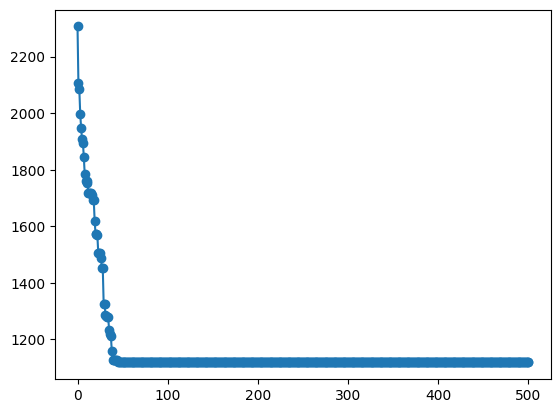

<Figure size 640x480 with 0 Axes>

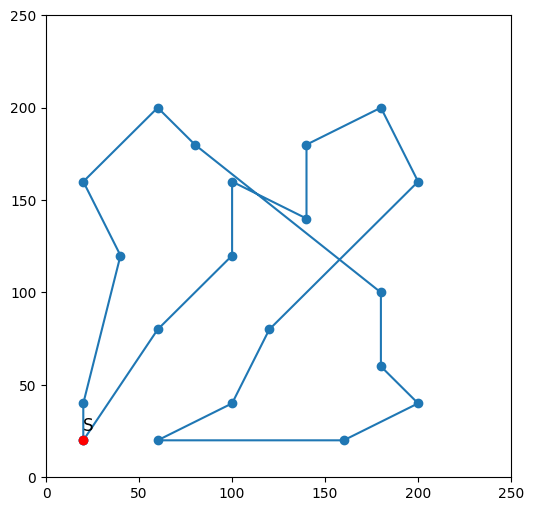

In [78]:
simulated_annealing()

##  Peut-on faire mieux ? 

Oui, utiliser des algorithmes évolutionnaires (objectif de la prochaine seance)

# 2. Problème d'attribution des stations d'épuration 

Comment placer des stations de traitement des eaux usées de telle sorte que les stations soient éloignées des habitations.

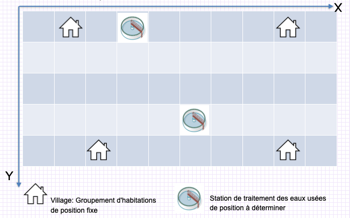

La classe Space formalise un espace de recherhce de ce problème. Terminez l'implémentation de la classe Space.

In [10]:
class Space:
    def __init__(self, height, width, num_stations):
        self.height = height
        self.width = width
        self.num_stations = num_stations
        self.villages = set()
        self.stations = set()

    def add_village(self, row, col):
        self.villages.add((row, col))

    def available_space(self):
        candidates = set((row, col)
                         for row in range(self.height)
                         for col in range(self.width)
                         )
        for village in self.villages:
            candidates.remove(village)
        for station in self.stations:
            candidates.remove(station)

        return candidates

    def fitness(self, stations):
        fitness = 0
        for village in self.villages:
            fitness += min([(abs(station[0] - village[0]) + abs(station[1] - village[1])) for station in stations])

        return fitness

    def get_neighbors(self, row, col):
        candidates = [
            (row - 1, col),
            (row + 1, col),
            (row, col - 1),
            (row, col + 1)
        ]
        neighbors = []
        for r, c in candidates:
            if   :#"Your Code Here"
                neighbors.append((r, c))

        return neighbors
    
    def get_best_neighbor():
        best_neighbors = []
        best_neighbor_fitness = None
        for station in self.stations:
            for replacement in self.get_neighbors(*station):
                neighbor = space.stations.copy()
                neighbor.remove(station)
                neighbor.add(replacement)
                new_fitness = self.fitness(neighbor)
                if best_neighbor_fitness is None or new_fitness > best_neighbor_fitness:
                    best_neighbor_fitness = new_fitness
                    best_neighbors = [neighbor]
                elif best_neighbor_fitness == new_fitness:
                    best_neighbors.append(neighbor) 
                    
        return random.choice(best_neighbors), best_neighbor_fitness
    
    def output_image(self, filename): 
        cell_size = 100
        cell_border = 2
        padding = 10
        fitness_text_size = 40
        village_img = Image.open("./assets/images/village.png").resize((cell_size, cell_size))
        station_img = Image.open("./assets/images/station.png").resize((cell_size, cell_size))
        font = ImageFont.truetype("assets/fonts/RobotoMono-regular.ttf", size=30)
        image = Image.new("RGBA",
                          (cell_size * self.width,
                           cell_size * self.height + fitness_text_size + 2 * padding),
                          "yellow")
        draw = ImageDraw.Draw(image)

        for i in range(self.width):
            for j in range(self.height):
                rect = [
                    (i * cell_size + cell_border, j * cell_size + cell_border),
                    ((i + 1) * cell_size - cell_border, (j + 1) * cell_size - cell_border)
                ]
                draw.rectangle(rect, "black")
                if (j, i) in self.villages:
                    image.paste(village_img, rect[0], village_img)
                if (j, i) in self.stations:
                    image.paste(station_img, rect[0], station_img)

        draw.rectangle(
            (0, self.height * cell_size, self.width * cell_size,
             self.height * cell_size + fitness_text_size + padding * 2),
            "black"
        )

        draw.text(
            (padding, self.height * cell_size + padding),
            f"fitness: {self.fitness(self.stations)}",
            fill="yellow",
            font=font
        )

        image.save(filename)





SyntaxError: invalid syntax (2335525808.py, line 40)

Testez votre code:

In [ ]:
s = Space(height=6, width=12, num_stations=2)

static_villages = [(1, 2), (1, 5), (1, 7), (3, 3), (5, 10)]
for v in static_villages:
    s.add_village(*v)
s.stations = {(5, 0), (0, 11)}

print("La fitness de  ", s.stations, " is ", s.fitness(s.stations))
s.output_image("stations-coins.png")
s.stations = set()


Ecrire une implémentation de l'algorithme $hill\_climbing$ pour resoudre ce problème.

In [13]:
def hill_climb(space, maximum=None, image_prefix=None, log=False):
    iteration_count = 0
    space.stations = set()
    for i in range(space.num_stations):
        space.stations.add(random.choice(list(space.available_space())))
        if log:
            print("The fitness of the initial state is: ", self.fitness(self.stations))
        if image_prefix:
            space.output_image(f"{image_prefix}{str(iteration_count).zfill(3)}.png")

    nb_better_found = 0;
    while maximum is None or iteration_count < maximum:
        iteration_count += 1 
        # Your code Here

        if log:
            nb_better_found += 1
            print(f"Found Better {nb_better_found} Neighbor: fitness {best_neighbor_fitness}")
        if image_prefix:
            self.output_image(f"{image_prefix}{str(iteration_count).zfill(3)}.png")
                

Ecrire une implémentation de l'algorithme $simulated\_annealing$ pour resoudre ce problème.

In [14]:
def simulated_annealing(space, maximum=None, image_prefix=None, log=False):
    """Peforms simulated annealing to find a solution""" 

    iteration_count = 0
    space.stations = set()
    for i in range(space.num_stations):
        space.stations.add(random.choice(list(space.available_space())))
    if log:
        print("The fitness of the initial state is: ", space.fitness(space.stations))
    if image_prefix:
        space.output_image(f"{image_prefix}{str(iteration_count).zfill(3)}.png")

    nb_move = 0

    t_schedule = exp_schedule(limit=maximum)
    for t in range(sys.maxsize):
        T = t_schedule(t)
        iteration_count+=1
        if T == 0:
            return space.stations
             
        #Your Code Here   
        
        if log:
            nb_move += 1
            print(f"Choose next state {nb_move} : fitness {best_neighbor_fitness}")
        if image_prefix:
            space.output_image(f"{image_prefix}{str(iteration_count).zfill(3)}.png")

In [ ]:

s = Space(height=6, width=12, num_stations=2)

static_villages = [(1, 2), (1, 5), (1, 7), (3, 3), (5, 10)]
for v in static_villages:
    s.add_village(*v)
s.stations = {(5, 0), (0, 11)}

print("The fitness of  ", s.stations, " is ", s.fitness(s.stations))
s.output_image("stations-coins.png")
s.stations = set()
# uncomment the following lines to randomly generate the villages
# for i in range(5):
#     s.add_village(random.randrange(s.height), random.randrange(s.width))

#stations = s.hill_climb(image_prefix="stations", log=True)
stations = simulated_annealing(s, maximum=10, image_prefix="stations", log=True)
print(stations)



